# Predicción de Calidad del Vino (Core)

**Objetivo**

Utilizar técnicas de clasificación aprendidas hasta el momento para predecir la calidad del vino basándose en características físico-químicas. Este ejercicio permitirá aplicar conceptos como la selección de características, preprocesamiento de datos, entrenamiento y evaluación de modelos de clasificación, y análisis de resultados mediante métricas y visualizaciones.

**Dataset**: Wine Quality Dataset

**Descripción del Dataset:** Este conjunto de datos contiene información sobre distintas características físico-químicas de muestras de vino tinto y su calidad asociada. Las características incluyen acidez fija, acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y alcohol. La calidad del vino está clasificada en una escala del 0 al 10.

**Instrucciones**:
1. **Carga y Exploración de Datos:**
   * Cargar el dataset y revisar su estructura básica.
   * Describir las variables y su distribución.
   * Identificar y tratar valores nulos y outliers.

2. **Preprocesamiento de Datos:**
   * Seleccionar características importantes para la clasificación.
   * Transformar variables categóricas en variables numéricas si es necesario.
   * Dividir los datos en conjuntos de entrenamiento y prueba.
   * Escalar las características.

3. **Entrenamiento de Modelos de Clasificación:**
   * Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
   * Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

4. **Evaluación de Modelos:**
   * Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
   * Generar un informe de clasificación para cada modelo.
   * Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

5. **Análisis y Comparación de Resultados:**
   * Comparar el rendimiento de los diferentes modelos.
   * Discutir cuál modelo ofrece el mejor rendimiento y por qué.
   * Identificar las fortalezas y debilidades de cada enfoque en este contexto.

6. **Repositorio en GitHub:**
   * Crear un repositorio en GitHub con el código y los resultados del análisis.
   * Crear un tag de liberación con una breve descripción de la versión final del proyecto.

**Adicional:**
   * Añadir un archivo README.md en el repositorio de GitHub que explique el propósito del proyecto, las técnicas utilizadas y cómo ejecutar el código.
   * Incluir una presentación o informe detallado en formato PDF con todos los hallazgos y conclusiones del análisis.

**Nota:** Asegúrate de documentar cada paso del proceso, incluyendo la justificación de las decisiones tomadas durante el preprocesamiento, la selección de modelos y la evaluación de los resultados. Esto proporcionará una visión completa y estructurada del trabajo realizado.

## *****************************************************************
## Contexto de las columnas:
This data frame contains the following columns:

Input variables (based on physicochemical tests)

1. **fixed_acidity**
2. **volatile_acidity**
3. **citric_acid**
4. **residual_sugar**
5. **chlorides**
6. **free_sulfur_dioxide**
7. **total_sulfur_dioxide**
8. **density**
9. **pH**
10. **sulphates**
11. **alcohol**

Output variable (based on sensory data)
12. **quality** (score between 0 and 10)
    
*Traducido*


Variables de entrada (basadas en pruebas fisicoquímicas)

1. **acidez_fija**
2. **acidez_volátil**
3. **ácido_cítrico**
4. **Azúcar_residual**
5. **Cloruros**
6. **Dióxido_de_azufre_libre**
7. **dióxido_de_azufre** total
8. **Densidad**
9. **pH**
10. **sulfatos**
11. **Alcohol**

Variable de salida (basada en datos sensoriales)
12. **calidad** (puntuación entre 0 y 10)
    
## --------------------------------------------------------------------

### 1. **Carga y Exploración de Datos:**
   * Cargar el dataset y revisar su estructura básica.
   * Describir las variables y su distribución.
   * Identificar y tratar valores nulos y outliers.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from utils import calculate_null, val_num_unicos, val_cat_unicos
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import  classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc

In [223]:
# Cargar datos desde un archivo CSV
df_original= pd.read_csv(r'data\wineqt.csv')
df_original.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [224]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [225]:
# Renombrar columnas del dataset
df_original.columns = (
    df_original.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df_original.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'id'],
      dtype='object')


In [226]:
# Identificar duplicados
duplicados = df_original.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [227]:
df1 = df_original.copy()
df1.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [228]:
# Eliminar columnas irrelevantes para el análisis
columns_to_drop = ['id']
df1.drop(columns=columns_to_drop, inplace=True)

In [229]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile_acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric_acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual_sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free_sulfur_dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total_sulfur_dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
ph,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


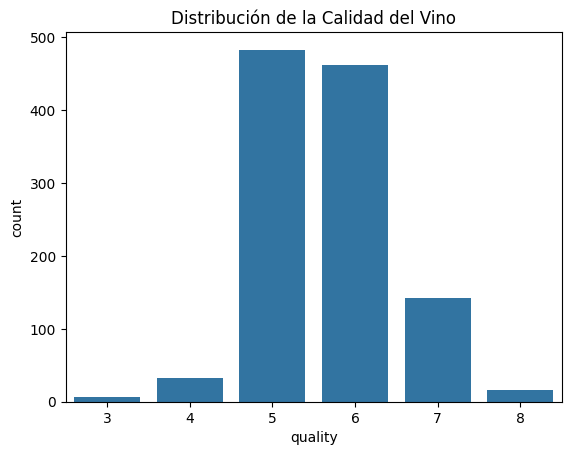

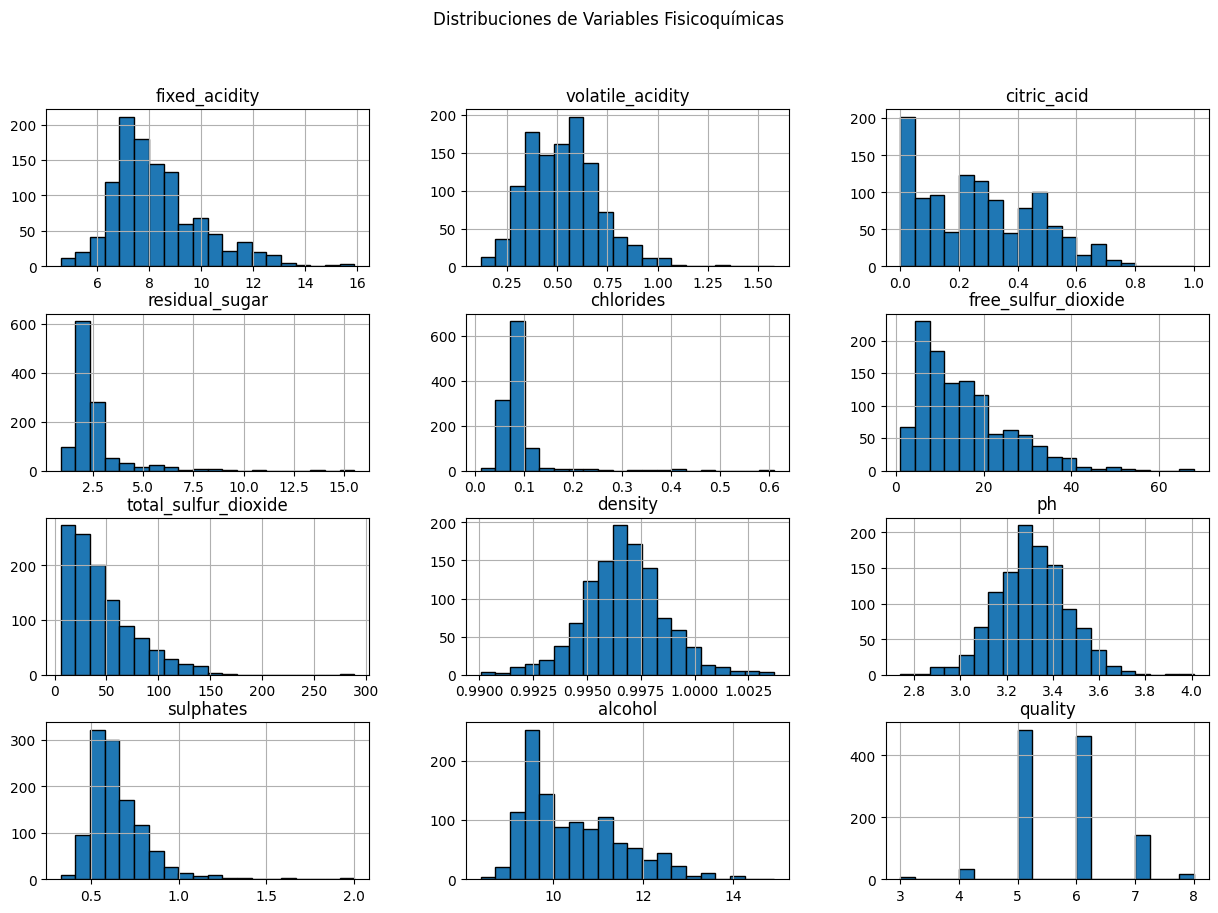

In [230]:
# Histograma de la variable 'quality'
sns.countplot(data=df1, x='quality')
plt.title('Distribución de la Calidad del Vino')
plt.show()

# Histogramas para las variables fisicoquímicas
df1.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribuciones de Variables Fisicoquímicas')
plt.show()

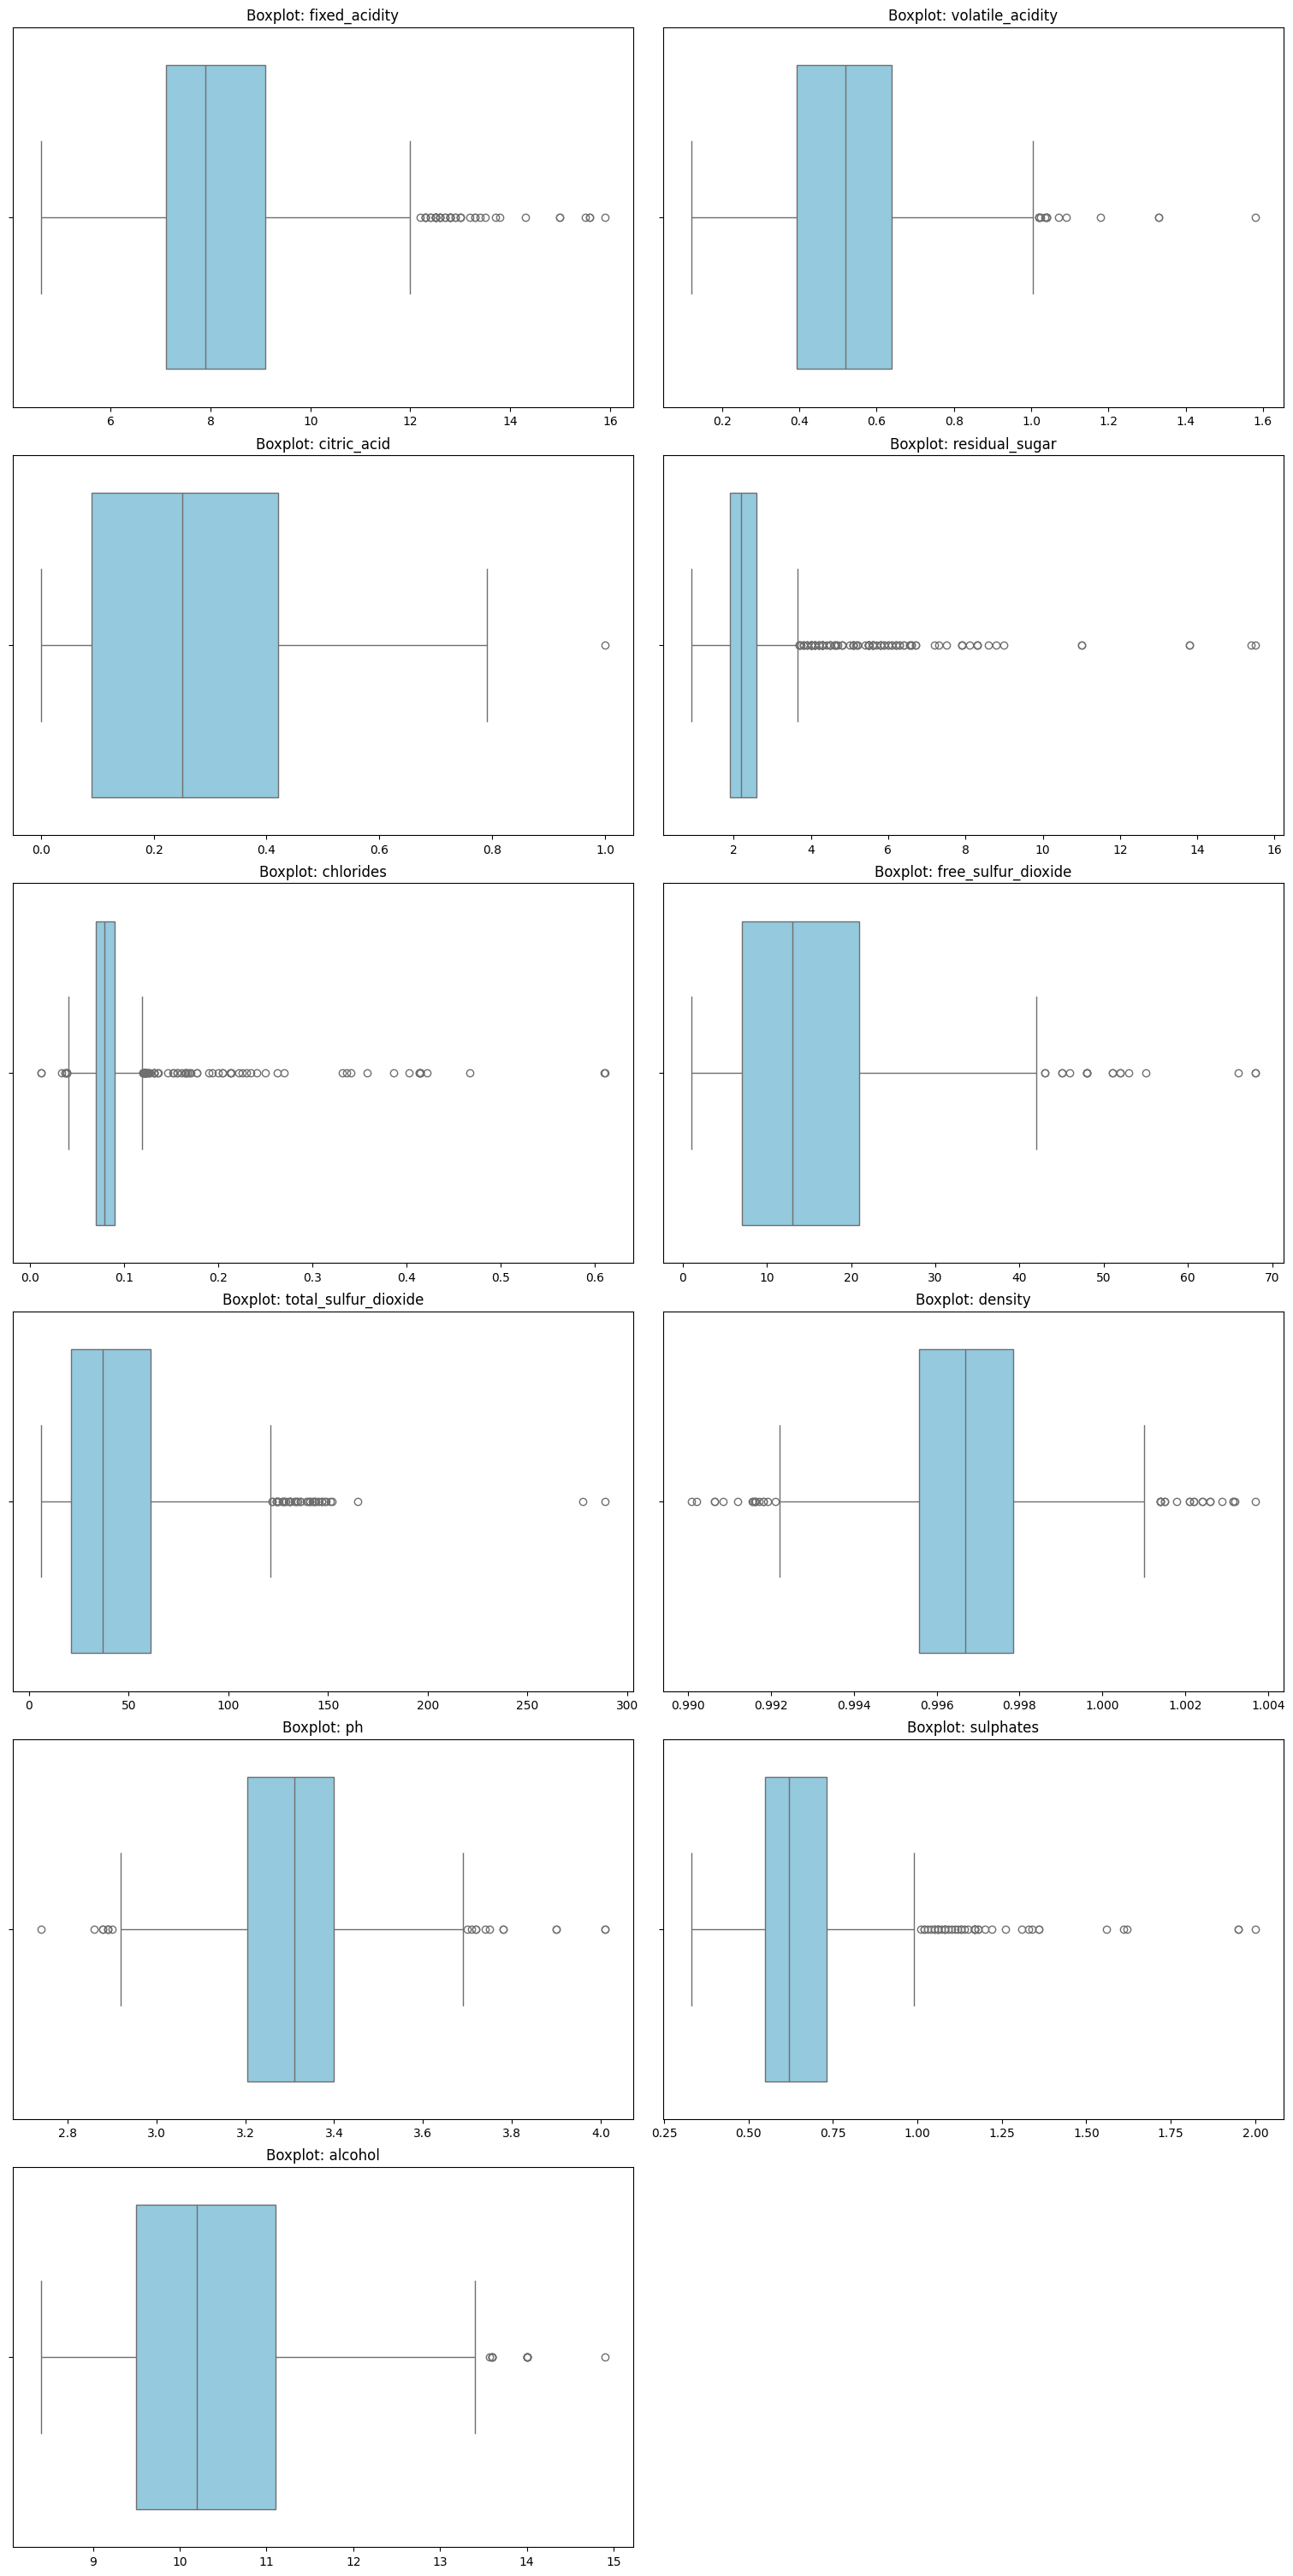

In [231]:
# Crear un DataFrame solo con las variables numéricas (excepto 'quality' e 'id')
df_numerical = df1.drop(columns=['quality', 'id'], errors='ignore')

# Configurar el tamaño de la cuadrícula de gráficos
num_columns = len(df_numerical.columns)  # Número de columnas numéricas
cols_per_row = 2  # Número de gráficos por fila
rows = -(-num_columns // cols_per_row)  # Calcular filas necesarias (redondeo hacia arriba)

# Crear subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(15, 5 * rows), constrained_layout=True)

# Aplanar ejes para iterar fácilmente (en caso de que sean múltiples filas y columnas)
axes = axes.flatten()

# Iterar por las columnas del DataFrame y crear un boxplot para cada una
for i, column in enumerate(df_numerical.columns):
    sns.boxplot(data=df_numerical, x=column, ax=axes[i], palette=None, hue=None, color='skyblue')
    axes[i].set_title(f'Boxplot: {column}', fontsize=12)
    axes[i].set_xlabel('')  # Opcional: Ocultar el título del eje X

# Ocultar gráficos vacíos si hay menos columnas que subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Mostrar los gráficos
plt.show()



In [232]:
val_num_unicos(df1)

Valores únicos en la columna 'fixed_acidity':
[ 7.4  7.8 11.2  7.9  7.3  6.7  5.6  8.5  7.6  6.9  6.3  7.1  8.3  5.2
  8.1  8.8  7.5  4.6  7.7  6.6  8.6 10.2  7.   7.2  8.   6.8  6.2  9.3
  5.   8.4 10.1  9.4  8.2  5.8  9.2  8.9  6.4 11.5  9.6 12.8  9.7  8.7
 12.  15.  10.8 11.1 10.  12.5 10.3 11.4  9.9 11.6 10.4 13.3 10.6  9.
  9.8 13.4 11.9 10.9 13.8  9.1 13.5  6.1 10.5 12.6 13.7  9.5 12.2 12.3
 15.6  5.3 11.3 13.   6.5 10.7 12.9 14.3 12.4 15.5 12.7 13.2 15.9  5.1
 11.8  4.9  5.9 11.7  5.4  5.7  6. ]

Valores únicos en la columna 'volatile_acidity':
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.615 0.61  0.32  0.39
 0.43  0.49  0.4   0.41  0.71  0.645 0.675 0.655 0.38  0.45  0.52  0.935
 0.5   0.51  0.42  0.59  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3
 0.55  0.62  1.02  0.775 0.9   0.545 0.575 0.63  0.56  0.31  0.54  1.07
 0.695 1.33  0.745 1.04  0.415 0.34  0.67  0.68  0.33  0.95  0.53  0.64
 0.885 0.805 0.73  0.37  1.09  0.44  0.57  0.48  1.    0.635 0.21  0.35
 0.975 0.8

In [233]:
calculate_null(df1) 

,datos sin NAs en q,Na en q,Na en %
fixed_acidity,1143,0,0.0
volatile_acidity,1143,0,0.0
citric_acid,1143,0,0.0
residual_sugar,1143,0,0.0
chlorides,1143,0,0.0
free_sulfur_dioxide,1143,0,0.0
total_sulfur_dioxide,1143,0,0.0
density,1143,0,0.0
ph,1143,0,0.0
sulphates,1143,0,0.0


### Preprocesamiento, Entrenamiento, Evaluación y Análisis

2. **Preprocesamiento de Datos:**
   * Seleccionar características importantes para la clasificación.
   * Transformar variables categóricas en variables numéricas si es necesario.
   * Dividir los datos en conjuntos de entrenamiento y prueba.
   * Escalar las características.

3. **Entrenamiento de Modelos de Clasificación:**
   * Entrenar al menos tres modelos de clasificación diferentes (por ejemplo, KNN, RandomForest, y Regresión Logística).
   * Utilizar validación cruzada para seleccionar los mejores hiperparámetros.

4. **Evaluación de Modelos:**
   * Evaluar los modelos utilizando métricas como exactitud, precisión, recall, F1-Score y matriz de confusión.
   * Generar un informe de clasificación para cada modelo.
   * Crear y visualizar la curva ROC y calcular el AUC para el mejor modelo.

5. **Análisis y Comparación de Resultados:**
   * Comparar el rendimiento de los diferentes modelos.
   * Discutir cuál modelo ofrece el mejor rendimiento y por qué.
   * Identificar las fortalezas y debilidades de cada enfoque en este contexto.

6. **Repositorio en GitHub:**
   * Crear un repositorio en GitHub con el código y los resultados del análisis.
   * Crear un tag de liberación con una breve descripción de la versión final del proyecto.

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric_acid             0.240821
fixed_acidity           0.121970
residual_sugar          0.022002
ph                     -0.052453
free_sulfur_dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total_sulfur_dioxide   -0.183339
volatile_acidity       -0.407394
Name: quality, dtype: float64


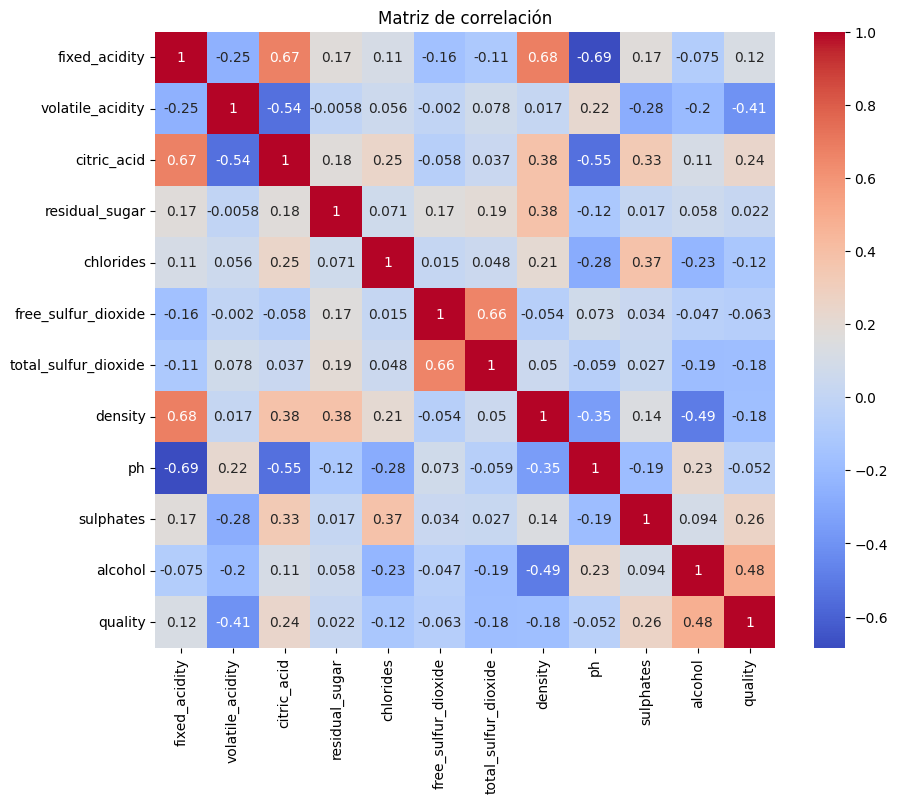

In [234]:
# Identificar características importantes

# Filtrar las columnas numéricas antes de calcular la correlación
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# Correlación entre el precio y otras variables numéricas
correlation_matrix = numeric_df.corr()
print(correlation_matrix['quality'].sort_values(ascending=False))

corr = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# df1_knn es el DataFrame
df_scal = df1.copy()

# Separar las características y la variable objetivo
X = df_scal.drop('quality', axis=1)
y = df_scal['quality']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [235]:
# ---- Modelo 1: KNN ----
knn = KNeighborsClassifier()

# Validación cruzada para KNN
scores_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Validación cruzada KNN: {scores_knn.mean():.2f}")

# Optimización de hiperparámetros para KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)
print(f"Mejores parámetros para KNN: {grid_knn.best_params_}")

# Entrenar el modelo con los mejores parámetros
best_knn = grid_knn.best_estimator_
best_knn.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_knn = best_knn.predict(X_test_scaled)

# Generar y mostrar el informe de clasificación
print("Informe de clasificación para KNN:\n", classification_report(y_test, y_pred_knn, zero_division=0))


Validación cruzada KNN: 0.55
Mejores parámetros para KNN: {'n_neighbors': 9}
Informe de clasificación para KNN:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.57      0.73      0.64       143
           6       0.53      0.48      0.51       146
           7       0.55      0.39      0.46        41
           8       0.00      0.00      0.00         4

    accuracy                           0.55       343
   macro avg       0.33      0.32      0.32       343
weighted avg       0.53      0.55      0.54       343



In [236]:
# ---- Modelo 2: Random Forest ----
rf = RandomForestClassifier(random_state=42)

# Validación cruzada para Random Forest
scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Validación cruzada Random Forest: {scores_rf.mean():.2f}")

# Optimización de hiperparámetros para Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros para Random Forest: {grid_rf.best_params_}")

# Usar el mejor modelo encontrado por GridSearchCV
best_rf = grid_rf.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluación del modelo en el conjunto de prueba
from sklearn.metrics import accuracy_score, classification_report

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del Random Forest en el conjunto de prueba: {accuracy_rf:.2f}")

# Informe detallado de clasificación
print("Informe de clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))


Validación cruzada Random Forest: 0.64
Mejores parámetros para Random Forest: {'max_depth': 20, 'n_estimators': 100}
Precisión del Random Forest en el conjunto de prueba: 0.64
Informe de clasificación para Random Forest:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.66      0.75      0.70       143
           6       0.62      0.63      0.62       146
           7       0.66      0.51      0.58        41
           8       1.00      0.25      0.40         4

    accuracy                           0.64       343
   macro avg       0.59      0.43      0.46       343
weighted avg       0.63      0.64      0.63       343



c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [237]:
# ---- Modelo 3: Regresión Logística ----
lr = LogisticRegression(max_iter=1000, random_state=42)

# Validación cruzada para Regresión Logística
scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Validación cruzada Regresión Logística: {scores_lr.mean():.2f}")

# Optimización de hiperparámetros para Regresión Logística
param_grid_lr = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros para Regresión Logística: {grid_lr.best_params_}")

# Usar el mejor modelo encontrado por GridSearchCV
best_lr = grid_lr.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_lr = best_lr.predict(X_test_scaled)

# Evaluación del modelo en el conjunto de prueba
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score

# Precisión
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Precisión de la Regresión Logística en el conjunto de prueba: {accuracy_lr:.2f}")

# Informe detallado de clasificación
print("Informe de clasificación para Regresión Logística:")
print(classification_report(y_test, y_pred_lr))

# Métricas adicionales: MAE, MSE, R²
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE (Error Absoluto Medio): {mae_lr:.2f}")
print(f"MSE (Error Cuadrático Medio): {mse_lr:.2f}")
print(f"R² (Coeficiente de Determinación): {r2_lr:.2f}")


Validación cruzada Regresión Logística: 0.59
Mejores parámetros para Regresión Logística: {'C': 1}
Precisión de la Regresión Logística en el conjunto de prueba: 0.62
Informe de clasificación para Regresión Logística:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.66      0.75      0.70       143
           6       0.59      0.62      0.60       146
           7       0.56      0.37      0.44        41
           8       0.00      0.00      0.00         4

    accuracy                           0.62       343
   macro avg       0.30      0.29      0.29       343
weighted avg       0.59      0.62      0.60       343

MAE (Error Absoluto Medio): 0.41
MSE (Error Cuadrático Medio): 0.47
R² (Coeficiente de Determinación): 0.19


c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, m

### En el siguiente bloque de código se busca mejorar el rendimiento de los modelos

In [238]:
# Copiar DataFrame
df_features = df1.copy()

# Separar características y variable objetivo
X = df_features.drop('quality', axis=1)
y = df_features['quality']

# Balancear clases con SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- Modelo 1: KNN ----
knn = KNeighborsClassifier()

# Validación cruzada para KNN
scores_knn = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
print(f"Validación cruzada KNN: {scores_knn.mean():.2f}")

# Optimización de hiperparámetros para KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='accuracy')
grid_knn.fit(X_train_scaled, y_train)
print(f"Mejores parámetros para KNN: {grid_knn.best_params_}")

# Evaluar KNN en el conjunto de prueba
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)
print(f"Precisión KNN en conjunto de prueba: {accuracy_score(y_test, y_pred_knn):.2f}")

# ---- Modelo 2: Random Forest ----
rf = RandomForestClassifier(random_state=42)

# Validación cruzada para Random Forest
scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=10, scoring='accuracy')
print(f"Validación cruzada Random Forest: {scores_rf.mean():.2f}")

# Optimización de hiperparámetros para Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=10, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)
print(f"Mejores parámetros para Random Forest: {grid_rf.best_params_}")

# Evaluar Random Forest en el conjunto de prueba
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)
print(f"Precisión Random Forest en conjunto de prueba: {accuracy_score(y_test, y_pred_rf):.2f}")

# ---- Modelo 3: Regresión Logística ----
lr = LogisticRegression(max_iter=1000, random_state=42)

# Validación cruzada para Regresión Logística
scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=10, scoring='accuracy')
print(f"Validación cruzada Regresión Logística: {scores_lr.mean():.2f}")

# Optimización de hiperparámetros para Regresión Logística
param_grid_lr = {'C': [0.1, 1, 10]}
grid_lr = GridSearchCV(lr, param_grid_lr, cv=10, scoring='accuracy')
grid_lr.fit(X_train_scaled, y_train)
print(f"Mejores parámetros para Regresión Logística: {grid_lr.best_params_}")

# Evaluar Regresión Logística en el conjunto de prueba
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test_scaled)
print(f"Precisión Regresión Logística en conjunto de prueba: {accuracy_score(y_test, y_pred_lr):.2f}")

# ---- Métricas adicionales para todos los modelos ----
for model_name, y_pred in zip(['KNN', 'Random Forest', 'Logistic Regression'], 
                              [y_pred_knn, y_pred_rf, y_pred_lr]):
    print(f"\nMétricas para {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R²: {r2_score(y_test, y_pred):.2f}")
    print(f"Informe de Clasificación:\n{classification_report(y_test, y_pred)}")


Validación cruzada KNN: 0.76
Mejores parámetros para KNN: {'n_neighbors': 3}
Precisión KNN en conjunto de prueba: 0.79
Validación cruzada Random Forest: 0.83
Mejores parámetros para Random Forest: {'max_depth': 20, 'n_estimators': 50}
Precisión Random Forest en conjunto de prueba: 0.86
Validación cruzada Regresión Logística: 0.63
Mejores parámetros para Regresión Logística: {'C': 1}
Precisión Regresión Logística en conjunto de prueba: 0.64

Métricas para KNN:
Accuracy: 0.79
MAE: 0.28
MSE: 0.44
R²: 0.84
Informe de Clasificación:
              precision    recall  f1-score   support

           3       0.91      1.00      0.96       139
           4       0.80      0.99      0.88       145
           5       0.70      0.52      0.60       155
           6       0.58      0.42      0.49       153
           7       0.79      0.89      0.84       144
           8       0.89      0.99      0.94       134

    accuracy                           0.79       870
   macro avg       0.78      0.8

# Análisis de Modelos

En este trabajo, se entrenaron tres modelos de clasificación: **K-Nearest Neighbors (KNN)**, **Random Forest** y **Regresión Logística**. Se realizó validación cruzada, optimización de hiperparámetros y evaluación en el conjunto de prueba obteniendo lo siguiente:

### **Mejor Modelo:**
El **Random Forest** resultó ser el mejor modelo, con una **precisión** de 0.86 en el conjunto de prueba, superando a los otros modelos. Además, mostró el mejor rendimiento en términos de **R²** (0.91) y **MAE** (0.17).

### **Modelo KNN:**
El **KNN** también tuvo un buen desempeño, con una precisión de 0.79 en el conjunto de prueba, pero presentó un **R²** más bajo (0.84) y una **MSE** más alta (0.44) en comparación con Random Forest.

### **Regresión Logística:**
La **Regresión Logística** tuvo un rendimiento inferior, con una precisión de 0.64 en el conjunto de prueba. Además, presentó las métricas más altas de **MAE** (0.47) y **MSE** (0.74), lo que indica un mayor error en sus predicciones.

---

## **Conclusión:**
- **Random Forest** es el modelo más robusto y preciso para este conjunto de datos.
- **KNN** es una opción viable pero con un rendimiento ligeramente inferior.
- **Regresión Logística** podría no ser la mejor opción para este tipo de problema, dado su desempeño limitado.



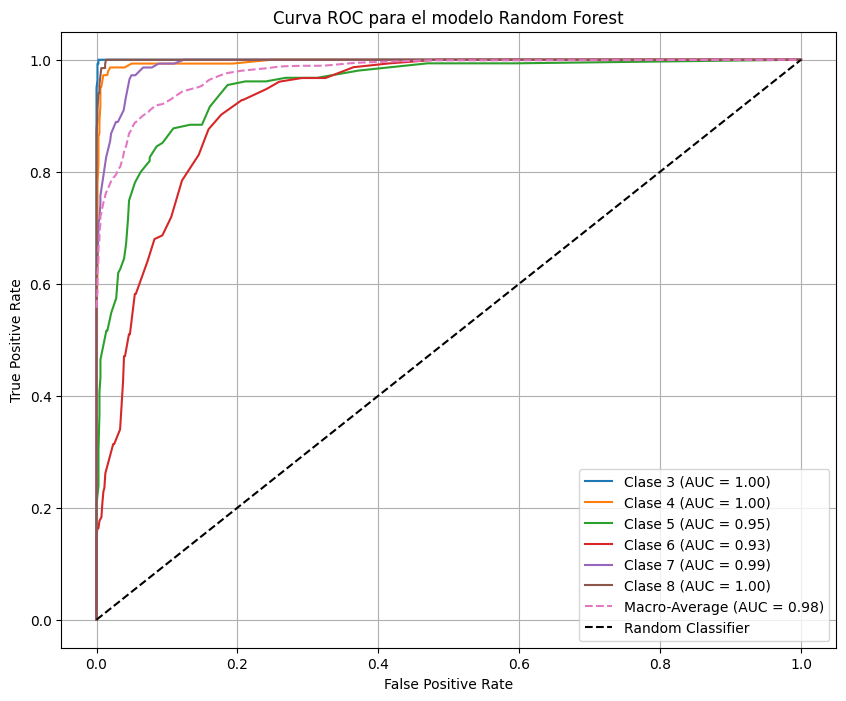

In [ ]:
# Obtener las probabilidades de predicción del modelo Random Forest
y_proba_rf = best_rf.predict_proba(X_test_scaled)

# Crear una curva ROC para cada clase
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(best_rf.classes_)

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == best_rf.classes_[i], y_proba_rf[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label=f"Clase {best_rf.classes_[i]} (AUC = {roc_auc[i]:.2f})")

# Curva promedio (macro-average)
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

roc_auc_macro = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, label=f"Macro-Average (AUC = {roc_auc_macro:.2f})", linestyle='--')

# Configuración de la gráfica
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para el modelo Random Forest')
plt.legend(loc="lower right")
plt.grid()
plt.show()



El gráfico muestra que el modelo Random Forest tiene un excelente rendimiento para la mayoría de las clases, especialmente en 3, 4, 7 y 8, con un rendimiento global muy sólido (Macro-Average AUC = 0.98).. La curva promedio también es muy alta, lo que confirma que el modelo tiene un buen desempeño general en este conjunto de datos.
